# Logistic regression on the body data set
Math 395 Learning from Large Data Sets 

Fall 2024, Hope College

In [26]:
import numpy as np
from scipy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 

## load the body data set

In [27]:
import pandas as pd
df = pd.read_table('../bodydata.txt', header = None, sep='\s+')
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,...,32.5,26.0,34.5,36.5,23.5,16.5,21.0,65.6,174.0,1
1,43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,...,34.4,28.0,36.5,37.5,24.5,17.0,23.0,71.8,175.3,1
2,40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,...,33.4,28.8,37.0,37.3,21.9,16.9,28.0,80.7,193.5,1
3,44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,...,31.0,26.2,37.0,34.8,23.0,16.6,23.0,72.6,186.5,1
4,42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,...,32.0,28.4,37.7,38.6,24.4,18.0,22.0,78.8,187.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,38.0,30.4,32.9,17.0,27.1,12.9,10.4,19.5,14.4,108.4,...,30.3,25.4,37.7,37.9,22.4,15.4,29.0,71.8,176.5,0
503,35.3,28.7,30.4,17.7,25.6,12.4,9.8,17.3,13.6,99.3,...,30.1,23.6,35.6,33.3,22.4,15.2,21.0,55.5,164.4,0
504,34.7,24.9,24.7,17.3,24.2,12.0,10.2,18.0,13.6,91.9,...,27.4,24.0,34.4,34.1,21.2,15.5,33.0,48.6,160.7,0
505,38.5,29.0,32.9,15.3,25.6,12.0,9.8,18.6,13.3,107.1,...,30.6,24.9,38.4,36.6,22.0,15.5,33.0,66.4,174.0,0


## visualize height and sex individually

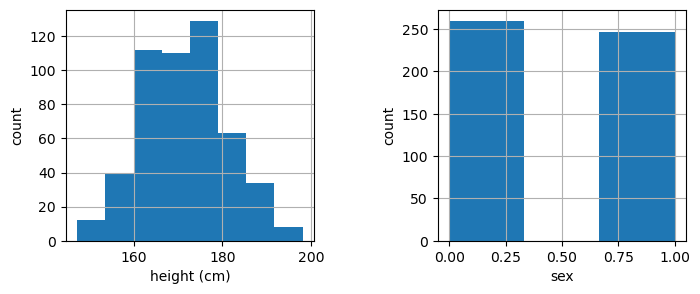

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3))

fig.subplots_adjust(wspace=.5, hspace=.5)

plt.subplot(1,2,1)
df[23].hist(bins=8)
plt.xlabel('height (cm)');
plt.ylabel('count');
#plt.title('height (cm)')

plt.subplot(1,2,2)
df[24].hist(bins=3)
plt.xlabel('sex');
plt.ylabel('count');
#plt.title('sex')

## make a scatterplot between height and sex

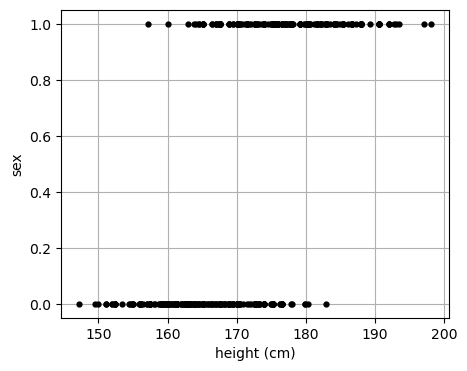

In [29]:
plt.figure(figsize=(5,4))

plt.plot(df[23],df[24],color='black', linestyle='', marker='.', markersize=7)
plt.ylabel('sex');
plt.xlabel('height (cm)');
plt.grid('on')

## Simple linear regression (sex ~ height)

[-2.98186586] [[0.03716826]]


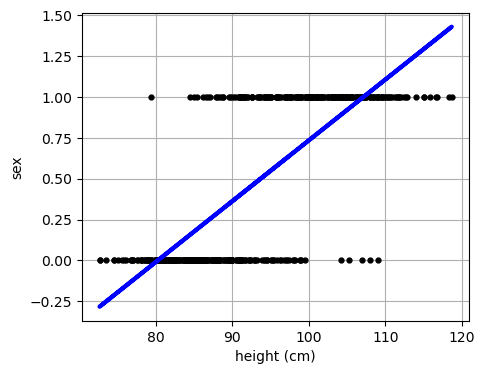

In [30]:
x = df[[10]] # height
y = df[[24]] # sex 

LRmodel = LinearRegression().fit(x, y)  # fit a linear reg model with intercept
print(LRmodel.intercept_,LRmodel.coef_)

yhat = LRmodel.predict(x)     # fitted values

plt.figure(figsize=(5,4))
plt.plot(x,y,'k.', markersize=7)
plt.plot(x,yhat,'b-', linewidth=3)
plt.xlabel('height (cm)');
plt.ylabel('sex');
plt.grid('on')


## Build a logistic regression model (sex ~ height) on the body data set

[-46.76271057] [[0.27291589]]
yhat:
[0.67363103 0.74638887 0.99763949 0.98426647 0.98696689 0.94111745
 0.96934464 0.97314996 0.73058051 0.96934464 0.91389509 0.85342674
 0.99644961 0.78082589 0.67363103 0.96934464 0.99706521 0.51058948
 0.6110524  0.78082589 0.78082589 0.92404412 0.59142595 0.78082589
 0.64295112 0.86012367 0.92012334 0.92012334 0.13376786 0.6110524
 0.96501941 0.75658145 0.98949638 0.99240752 0.5980039  0.40926381
 0.94823956 0.40926381 0.85342674 0.97092572 0.98508978 0.50376809
 0.59142595 0.74638887 0.92012334 0.95905055 0.98949638 0.83173654
 0.55134679 0.23401861 0.37672613 0.67363103 0.59142595 0.95085396
 0.12161621 0.0930103  0.51058948 0.97092572 0.67363103 0.67363103
 0.82395868 0.98200751 0.23401861 0.53101986 0.94823956 0.23401861
 0.85342674 0.13376786 0.99644961 0.75658145 0.49012365 0.94261174
 0.2541517  0.93476852 0.82395868 0.70289291 0.84288593 0.44261604
 0.95334281 0.99911498 0.91601857 0.75658145 0.9259376  0.97242757
 0.75658145 0.9259376  0.82

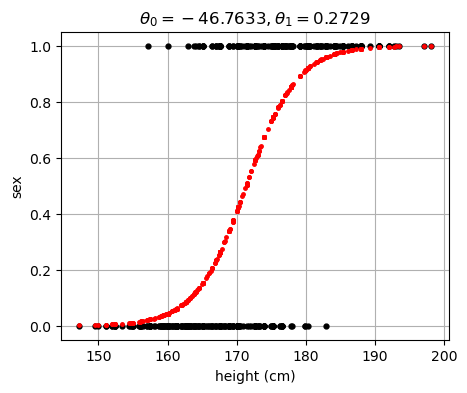

In [31]:
x = df[[23]].values  # height
y = df[[24]].values  # sex

logisticModel1 = LogisticRegression(C=1e5).fit(x, y.ravel())  # C = 1/lambda
print(logisticModel1.intercept_,logisticModel1.coef_)

P = logisticModel1.predict_proba(x) # fitted values from the sigmoid curve. It has two columns corresponding to 0 and 1
yhat = P[:,1] 
print(f"yhat:\n{yhat}")

plt.figure(figsize=(5,4))
plt.plot(x,y,'k.', markersize=7)
plt.plot(x,yhat,'r.', markersize=5)

#xgrid = np.linspace(np.min(x,axis=0),np.max(x,axis=0),100).reshape(-1,1)
#yhatgrid = logisticModel.predict_proba(xgrid)
#plt.plot(xgrid,yhatgrid[:,1],'r-', linewidth=3)

plt.xlabel('height (cm)');
plt.ylabel('sex');
plt.grid('on')
plt.title(r"$\theta_0=-46.7633, \theta_1=0.2729$")

pred = logisticModel1.predict(x) # prediction of labels (0/1)
print(pred)

## Visualize the contour curves of the empirical logistic loss

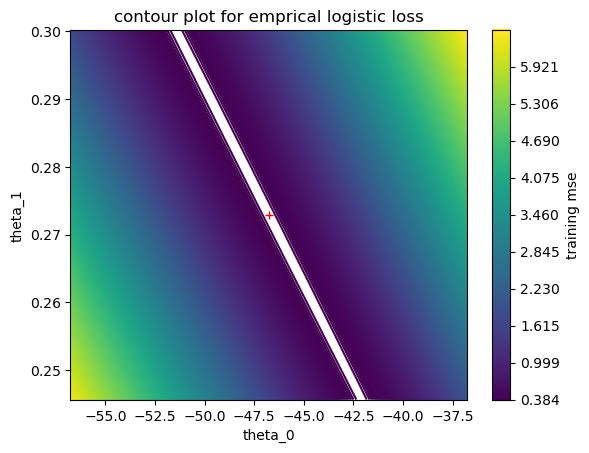

In [32]:
theta0_fitted = logisticModel1.intercept_[0]
theta1_fitted = logisticModel1.coef_[0,0]
n = y.shape[0]

theta0 = np.linspace(theta0_fitted-10, theta0_fitted+10, 200)
theta1 = np.linspace(theta1_fitted*0.9, theta1_fitted*1.1, 100)
Theta0,Theta1 = np.meshgrid(theta0, theta1) 

MSE_train = np.zeros(Theta0.shape)
for i in range(n):
    MSE_train += np.log(1+np.exp((1-2*y[i,0])*(Theta0+x[i,0]*Theta1))) 
                   
MSE_train = MSE_train/n

MSE_train_min = np.min(MSE_train)
MSE_train_max = np.max(MSE_train)

levels = np.linspace(MSE_train_min, MSE_train_max, 1000)
#levels = [MSE_train_max * 0.95 ** (n - 1) for n in range(1, 101)][::-1]
#levels = [MSE_train_min * 1.01 ** (n - 1) for n in range(1, 101)]

# Creating contour plot
contour = plt.contour(Theta0, Theta1, MSE_train, levels = levels)

# Adding colorbar
plt.colorbar(contour, label='training mse')
plt.plot(theta0_fitted,theta1_fitted, 'r+')

# Adding labels and title
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.title('contour plot for emprical logistic loss')

# Displaying the plot
plt.show()

## Build a second logistic regression model (sex ~ height+weight) on the body data set

### First, make a scatter plot between height and weight, color coded by sex

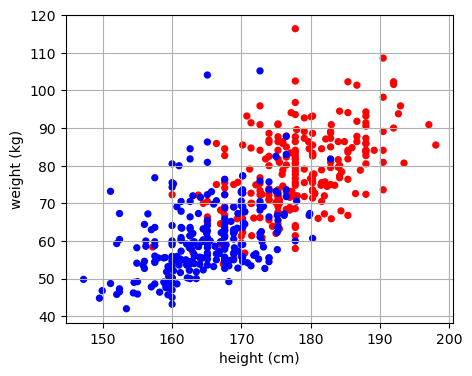

In [33]:
weight = df[[22]]
height = df[[23]]
sex = df[[24]].values.ravel()

plt.figure(figsize=(5,4))

colors = np.array(['blue', 'red'])
plt.scatter(height,weight, s=18, c=colors[sex.astype(int)])
plt.ylabel('weight (kg)');
plt.xlabel('height (cm)');
plt.grid('on')

### Now, fit a logistic regression model with features weight and height

In [34]:
logisticModel2 = LogisticRegression(C=1e5).fit(df[[22,23]], sex)

theta0_fitted = logisticModel2.intercept_
theta1_fitted = logisticModel2.coef_
print(theta0_fitted,theta1_fitted)

[-40.99091812] [[0.10149272 0.19846152]]


### Plot the decision boundary

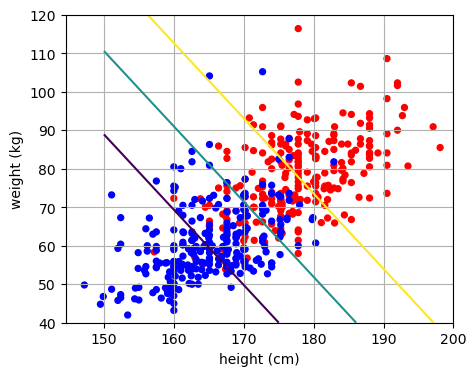

In [35]:
forearm_grid_size = 200 
thigh_grid_size = 300

forearm_grid = np.linspace(40,120,forearm_grid_size)
thigh_grid = np.linspace(150,200,thigh_grid_size)

probs = np.zeros([forearm_grid_size,thigh_grid_size])
for i in range(forearm_grid_size):
    for j in range(thigh_grid_size):
        probs[i,j] = logisticModel2.predict_proba([[forearm_grid[i],thigh_grid[j]]])[0,1]

plt.figure(figsize=(5,4))

plt.scatter(df[[23]], df[[22]], s=18, c=colors[sex.astype(int)])

contour = plt.contour(thigh_grid, forearm_grid, probs, levels = [.1, .5, .9])

#plt.colorbar(contour, label='probability')

plt.ylabel('weight (kg)');
plt.xlabel('height (cm)');
plt.grid('on')

# Displaying the plot
plt.show()

## standardize all features (and collect feature names)

In [36]:
y = df[[24]].values.ravel() # sex
X = df[df.columns.drop([24])]  # matrix of all features (without weight)
X_norm = StandardScaler().fit_transform(X)

feature_names = [
    'Biacromial diameter',  
    'Biiliac diameter',
    'Bitrochanteric diameter',
    'Chest depth', 
    'Chest diameter', 
    'Elbow diameter',
    'Wrist diameter',
    'Knee diameter',
    'Ankle diameter',
    'Shoulder girth',
    'Chest girth', 
    'Waist girth',
    'Navel girth',
    'Hip girth',
    'Thigh girth',
    'Bicep girth', 
    'Forearm girth', 
    'Knee girth',
    'Calf maximum girth',
    'Ankle minimum girth', 
    'Wrist minimum girth',
    'Age',
    'Weight',
    'Height']

### Plot the coefficients of the fitted logistic regression model

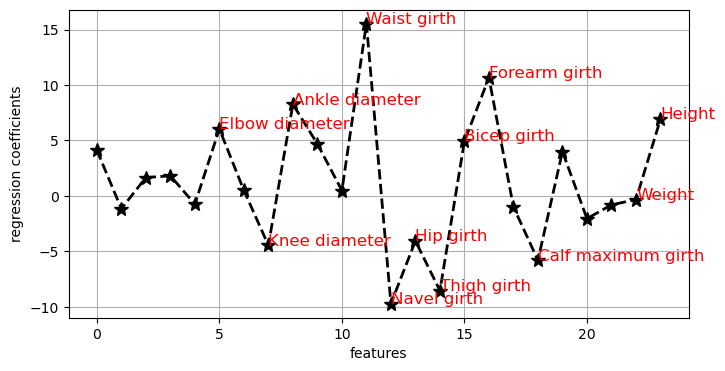

In [37]:
logisticModelfull = LogisticRegression(C=1e5,max_iter=500).fit(X_norm, y)
theta0_full = logisticModelfull.intercept_    
theta1_full = logisticModelfull.coef_        

plt.figure(figsize=(8,4))
plt.plot(theta1_full.reshape(-1,1), color='black',linestyle='dashed',linewidth =2,
         marker='*', markersize=10) # linear regression without regularization
for i in [5,7, 8,11, 12,13, 14,15, 16,18,22, 23]:
    plt.text(i, theta1_full[0,i], feature_names[i], fontsize = 12, color='red')
plt.xlabel('features');
plt.ylabel('regression coefficients');
plt.grid('on')

## Regularized logistic regression

### First, use cross validation to figure out the optimal value of the regularization parameter

In [38]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(Cs = [0.001, 0.005,0.01, 0.05,0.1, 0.5,1,5,10], cv=5, penalty='l1', solver = 'liblinear', max_iter=500, random_state=0).fit(X, y)

print('best alpha =', clf.C_)

best alpha = [0.1]


### Run regularized logistic regression with parameter value found above

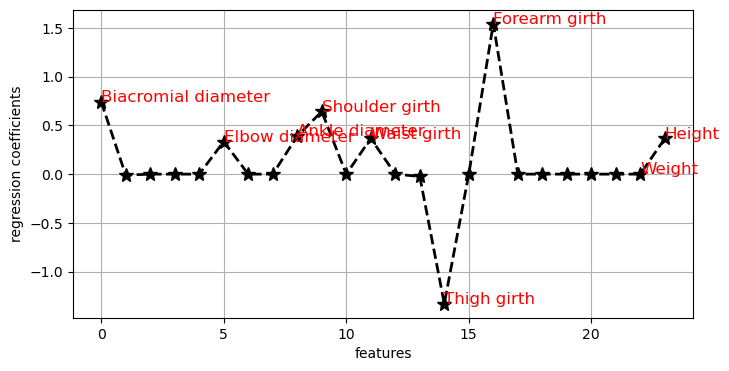

In [39]:
logisticModelfull = LogisticRegression(C= 0.1, penalty='l1', solver = 'liblinear', max_iter=500).fit(X_norm, y)
theta0_full = logisticModelfull.intercept_    # beta_0
theta1_full = logisticModelfull.coef_         # beta_1

plt.figure(figsize=(8,4))
plt.plot(theta1_full.reshape(-1,1), color='black',linestyle='dashed',linewidth =2,
         marker='*', markersize=10) # linear regression without regularization
for i in [0,5, 9, 8,11, 14, 16, 22, 23]:
    plt.text(i, theta1_full[0,i], feature_names[i], fontsize = 12, color='red')
plt.xlabel('features');
plt.ylabel('regression coefficients');
plt.grid('on')

### Thigh and forearm griths stand out as the most important features. We make a scatterplot between them, color coded by sex

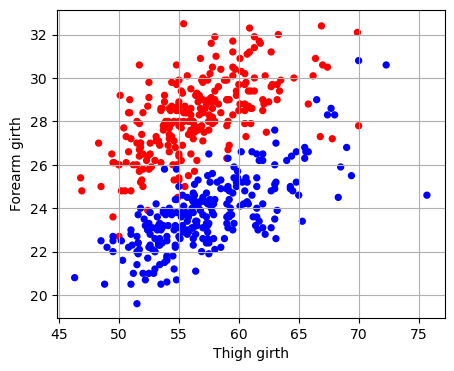

In [40]:
sex = df[[24]].values.ravel()

plt.figure(figsize=(5,4))

colors = np.array(['blue', 'red'])
plt.scatter(df[[14]],df[[16]], s=18, c=colors[sex.astype(int)])
#plt.scatter(X_norm[:,14],X_norm[:,16], s=18, c=colors[sex.astype(int)])
plt.xlabel('Thigh girth');
plt.ylabel('Forearm girth');
plt.grid('on')

In [41]:
logisticModel2 = LogisticRegression(C=1e5).fit(df[[14,16]], sex)

theta0_fitted = logisticModel2.intercept_
theta1_fitted = logisticModel2.coef_
print(theta0_fitted,theta1_fitted)

[-20.49531427] [[-0.77311516  2.50003518]]


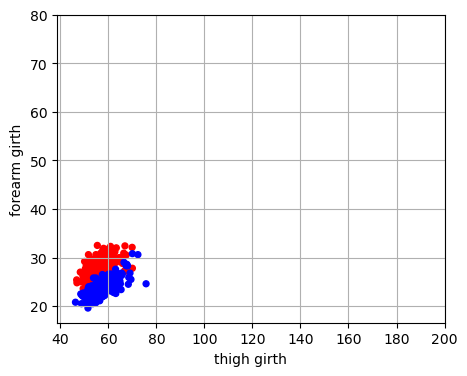

In [45]:
forearm_grid_size = 200 
thigh_grid_size = 300

forearm_grid = np.linspace(20,40,forearm_grid_size)
thigh_grid = np.linspace(150,200,thigh_grid_size)

probs = np.zeros([forearm_grid_size,thigh_grid_size])
for i in range(forearm_grid_size):
    for j in range(thigh_grid_size):
        probs[i,j] = logisticModel2.predict_proba([[forearm_grid[i],thigh_grid[j]]])[0,1]

plt.figure(figsize=(5,4))

plt.scatter(df[[14]], df[[16]], s=18, c=colors[sex.astype(int)])

contour = plt.contour(thigh_grid, forearm_grid, probs, levels = [.1, .5, .9])

#plt.colorbar(contour, label='probability')

plt.ylabel('forearm girth');
plt.xlabel('thigh girth');
plt.grid('on')

# Displaying the plot
plt.show()